<a href="https://colab.research.google.com/github/feuziq47/pythonML/blob/master/ML6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive  

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import pandas as pd
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings(action='ignore')
boston = load_boston()

df_boston = pd.DataFrame(boston.data, columns=boston.feature_names)

df_boston['PRICE'] = boston.target
print('Boston Dataset Size:', df_boston.size)
df_boston.head()


Boston Dataset Size: 7084


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


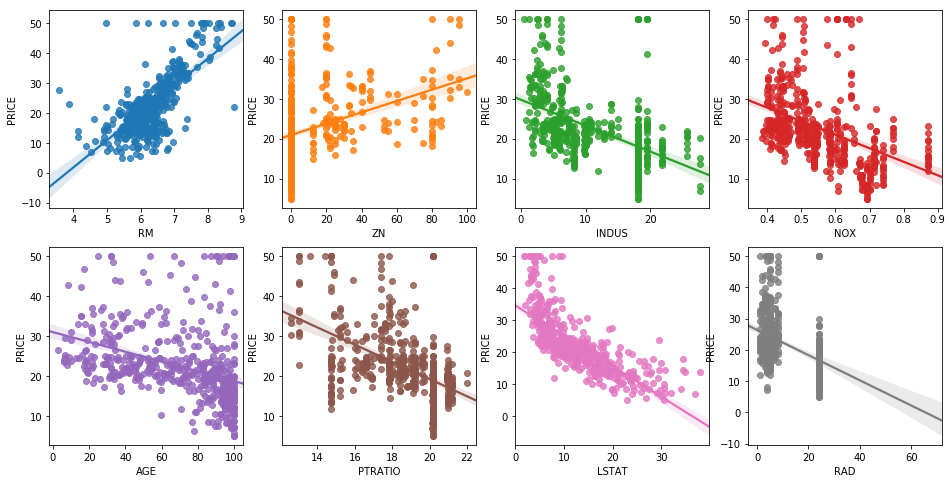

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

fig, axs = plt.subplots(figsize=(16, 8), ncols=4, nrows=2)
lm_features=['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']

for i, feature in enumerate(lm_features):
  row = int(i/4)
  col = i%4
  
  sns.regplot(x=feature, y='PRICE', data=df_boston, ax=axs[row][col])

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = df_boston['PRICE']
x_data = df_boston.drop(['PRICE'], axis=1, inplace=False)

x_train, x_test, y_train, y_test = train_test_split(x_data, y_target,
                                                    test_size=0.3, 
                                                    random_state=156)

lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('MSE: {0:.3f}, RMSE: {1:.3f}'.format(mse, rmse))
print('Variance score: {0:.3f}'.format(r2_score(y_test, y_pred)))
print('Bias:', lr.intercept_)
print('Weight:', np.round(lr.coef_, 1))
coeff = pd.Series(data=np.round(lr.coef_, 1), index=x_data.columns)
coeff.sort_values(ascending=False)


MSE: 17.297, RMSE: 4.159
Variance score: 0.757
Bias: 40.995595172164755
Weight: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
B           0.0
TAX        -0.0
AGE         0.0
INDUS       0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [0]:
from sklearn.model_selection import cross_val_score

y_target = df_boston['PRICE']
x_data = df_boston.drop(['PRICE'], axis=1, inplace=False)
lr = LinearRegression()

neg_mse_scores = cross_val_score(lr, x_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_score = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_score)

print('Fold Negative MSE score:', np.round(neg_mse_scores, 2))
print('Fold RMSE score:', np.round(rmse_score, 2))
print('Avg RMSE score:', np.round(avg_rmse, 2))

Fold Negative MSE score: [-12.46 -26.05 -33.07 -80.76 -33.31]
Fold RMSE score: [3.53 5.1  5.75 8.99 5.77]
Avg RMSE score: 5.83


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

In [0]:
X_train , X_test, y_train , y_test = train_test_split(data_scaled, cancer.target, test_size=0.3, random_state=0)

In [0]:
from sklearn.metrics import accuracy_score, roc_auc_score

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)

print('Accuracy: {:0.3f}'.format(accuracy_score(y_test, lr_preds)))
print('ROC_AUC: {:0.3f}'.format(roc_auc_score(y_test , lr_preds)))


Accuracy: 0.982
ROC_AUC: 0.979


In [0]:
from sklearn.model_selection import GridSearchCV

params={'penalty':['l2', 'l1'],
        'C':[0.01, 0.1, 1, 1, 5, 10]}

grid_clf = GridSearchCV(lr_clf, param_grid=params,
                                        scoring='accuracy', cv=3 )
grid_clf.fit(data_scaled, cancer.target)

print('Optimal Hyper parameter:{0}, Max Accuracy:{1:.3f}'
        .format(grid_clf.best_params_, grid_clf.best_score_))

Optimal Hyper parameter:{'C': 0.1, 'penalty': 'l2'}, Max Accuracy:0.979


In [0]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np

boston=load_boston()
bostonDF=pd.DataFrame(boston.data,columns=boston.feature_names)

bostonDF['PRICE'] = boston.target
y_target=bostonDF['PRICE']
X_data=bostonDF.drop(['PRICE'],axis=1,inplace=False)

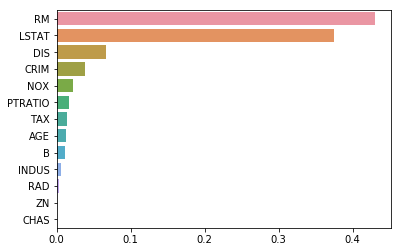

In [0]:
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
%matplotlib inline

rf_reg = RandomForestRegressor(n_estimators=1000)

rf_reg.fit(X_data, y_target)

feature_series = pd.Series(data=rf_reg.feature_importances_, index=X_data.columns )
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x= feature_series, y=feature_series.index)

In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=0, n_estimators=1000)
neg_mse_scores = cross_val_score(rf, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(' Fold Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' Fold RMSE scores : ', np.round(rmse_scores, 2))
print(' Average RMSE : {0:.3f} '.format(avg_rmse))

 Fold Negative MSE scores:  [ -7.93 -13.06 -20.53 -46.31 -18.8 ]
 Fold RMSE scores :  [2.82 3.61 4.53 6.8  4.34]
 Average RMSE : 4.420 
